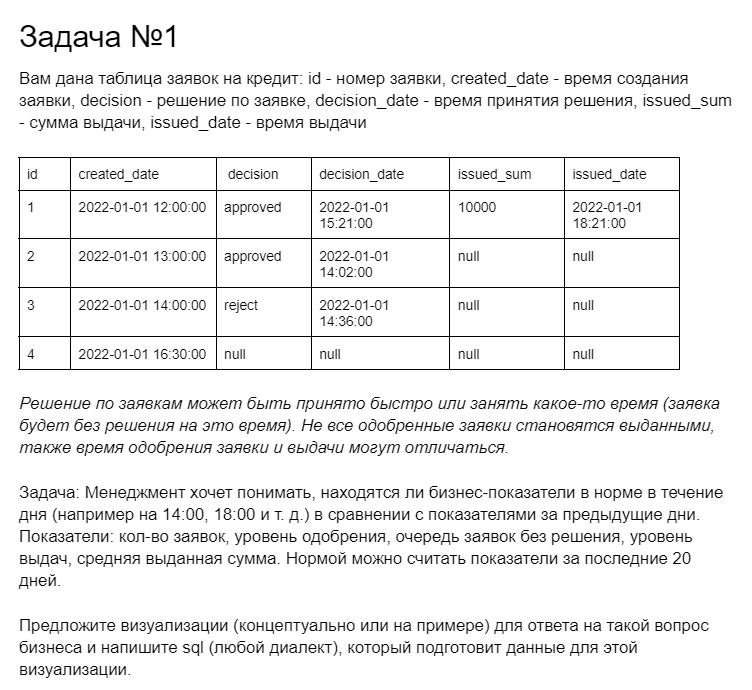

# **Решение**

Я нагенерил себе датасет на весь 2022 год, чтобы было легче воспринимать данные и загрузил их в SMSS. SQL запрос, я не стал тут разбивать по времени. Надо было каждую cte разбить на 3 части(до 10, до 14, до 18) и потом join.

In [ ]:
WITH
create_tab AS (
    SELECT
        CAST(created_date AS DATE) AS "Дата",
        COUNT(id) AS "Заявок принято",
        COUNT(CASE WHEN decision IS NULL THEN 1 END) AS "На рассмотрении"
    FROM [Тестовое].[dbo].[credit_applications_sample]
    GROUP BY CAST(created_date AS DATE)
),
decision_tab AS (
    SELECT
        CAST(decision_date AS DATE) AS "Дата",
        COUNT(id) AS "Принято решений",
        COUNT(CASE WHEN decision = 'approved' THEN 1 END) AS "Одобрено кредитов",
        COUNT(CASE WHEN decision = 'reject' THEN 1 END) AS "Отказано",
        ROUND(COUNT(CASE WHEN decision = 'approved' THEN 1 END) * 100.0 / COUNT(id),0) AS "Процент одобрения"
    FROM [Тестовое].[dbo].[credit_applications_sample]
    WHERE CAST(decision_date AS DATE) IS NOT NULL
    GROUP BY CAST(decision_date AS DATE)
),
issued_tab AS (
    SELECT
        CAST(issued_date AS DATE) AS "Дата",
        COUNT(id) AS "Выданных",
        SUM(issued_sum) AS "Сумма кредитов",
        ROUND(SUM(issued_sum) * 1.0 / NULLIF(COUNT(id), 0), 0) AS "Средняя сумма кредита"
    FROM [Тестовое].[dbo].[credit_applications_sample]
    WHERE CAST(issued_date AS DATE) IS NOT NULL
    GROUP BY CAST(issued_date AS DATE)
)

SELECT
    COALESCE(create_tab."Дата", decision_tab."Дата", issued_tab."Дата") AS "Дата",
    COALESCE(create_tab."Заявок принято", 0) AS "Заявок принято",
    COALESCE(create_tab."На рассмотрении", 0) AS "На рассмотрении",
    COALESCE(decision_tab."Принято решений", 0) AS "Принято решений",
    COALESCE(decision_tab."Одобрено кредитов", 0) AS "Одобрено кредитов",
    COALESCE(decision_tab."Отказано", 0) AS "Отказано",
    COALESCE(decision_tab."Процент одобрения", 0) AS "Процент одобрения",
    COALESCE(issued_tab."Выданных", 0) AS "Выданных",
    COALESCE(issued_tab."Сумма кредитов", 0) AS "Сумма кредитов",
    COALESCE(issued_tab."Средняя сумма кредита", 0) AS "Средняя сумма кредита"
FROM
    create_tab
FULL JOIN
    decision_tab ON create_tab."Дата" = decision_tab."Дата"
FULL JOIN
    issued_tab ON create_tab."Дата" = issued_tab."Дата" OR decision_tab."Дата" = issued_tab."Дата"
ORDER BY
    "Дата";


Также данные загрузил в Power BI

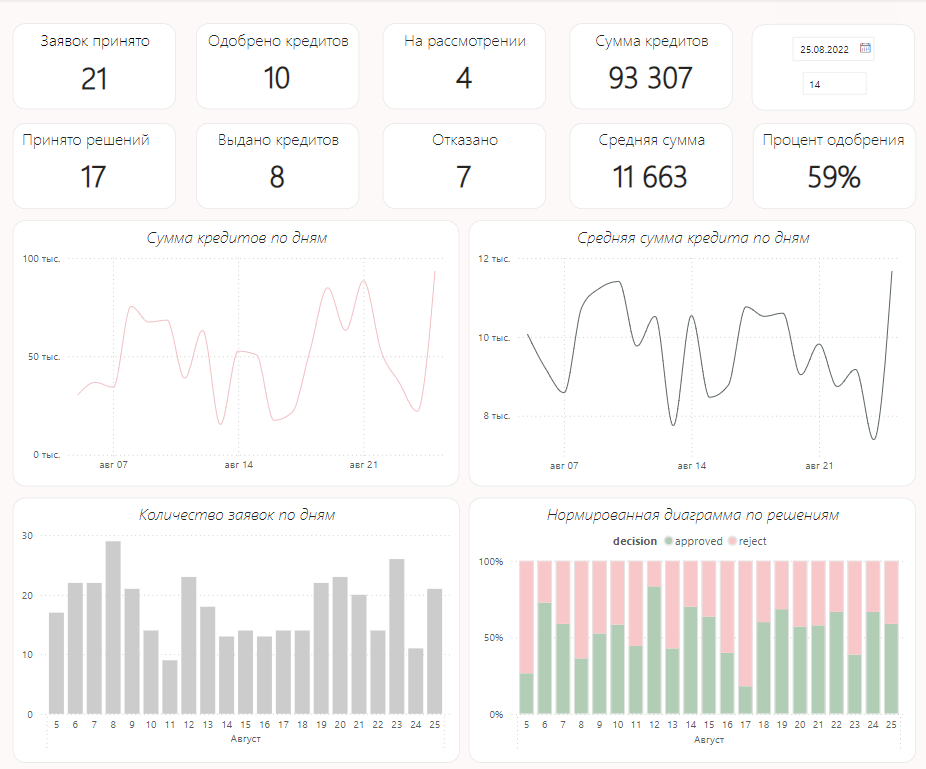

Концепция: фильтр по дате позволяет выбрать любую дату в пределах 2022 года, чтобы отображать данные, соответствующие выбранному дню. Под фильтром даты расположен дополнительный фильтр по времени, в который можно ввести любой час для получения информации, актуальной на этот момент.

Отображаемые данные включают: количество принятых заявок, принятых решений, одобренных кредитов, выданных кредитов, заявок на рассмотрении, отказов, а также общую сумму кредитов, среднюю сумму кредита и процент одобрения.
Также представлены графики, отображающие данные за выбранный день и последние 20 дней, с разбивкой по сумме кредитов, средней сумме кредита, количеству заявок, и нормированной диаграммой по принятым решениям.
